In [33]:
import pandas as pd
import numpy as np

In [2]:
#Let's take a look at the yelp COVID data:

In [4]:
covid_data = pd.read_json('./data/yelp/covid_19_dataset_2020_06_10/yelp_academic_dataset_covid_features.json', lines=True)

In [5]:
covid_data.head()

,business_id,highlights,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Covid Banner,Temporary Closed Until,Virtual Services Offered
0,9kXRUIkwdDtnAPO6tVo51g,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,H6D5HOTfMjrZt7r1EObZ1g,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FYddq7fUtzobZcw4jOJgVA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,c75jLTjlgA9q3gImLEGT6w,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,YfzPiY50h_10Sjlg3mnNWQ,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [6]:
len(covid_data)

209795

In [16]:
business_df = pd.read_json('./data/yelp/yelp_dataset/yelp_academic_dataset_business.json', lines=True)

In [21]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [20]:
business_df[business_df['name'] == 'Great Clips'].describe()

,latitude,longitude,stars,review_count,is_open
count,133.000000,133.000000,133.000000,133.000000,133.000000
mean,37.421513,-96.027143,2.834586,13.691729,0.924812
std,6.963077,17.693677,0.667769,8.662161,0.264691
min,28.248529,-123.184840,1.500000,5.000000,0.000000
25%,30.301488,-122.539221,2.500000,7.000000,1.000000
50%,39.938903,-84.365754,3.000000,11.000000,1.000000
75%,45.414217,-82.867290,3.000000,18.000000,1.000000
max,49.332878,-71.082297,5.000000,43.000000,1.000000


In [22]:
business_df['city'].describe()

count     160585
unique       836
top       Austin
freq       22416
Name: city, dtype: object

In [24]:
business_df[business_df['city']=='Austin'].describe()

,latitude,longitude,stars,review_count,is_open
count,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000
mean,30.300632,-97.758155,3.854568,61.328917,0.749420
std,0.109178,0.187940,0.963612,153.219679,0.433357
min,30.002736,-98.082776,1.000000,5.000000,0.000000
25%,30.246307,-97.783612,3.500000,9.000000,0.000000
50%,30.286937,-97.745209,4.000000,19.000000,1.000000
75%,30.359038,-97.725385,4.500000,50.000000,1.000000
max,42.344857,-71.080926,5.000000,4942.000000,1.000000


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [29]:
business_df['categories'].fillna('NA', inplace = True)

In [32]:
business_df[(business_df['categories'].str.match('Food')) & (business_df['city'] == 'Austin')]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38,Xw8tuI30T-xihpzwBV-zJg,El Pollo Rey,1725 E Riverside Dr,Austin,TX,78741,30.243493,-97.730141,5.0,11,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food Trucks, Restaurants, Specialty Food, Food...",None
79,gjMCRTs0IZbw9bZLG837Bg,CaveMan Cuisine,,Austin,TX,78704,30.245673,-97.768836,1.5,6,0,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Food, Food Delivery Services",None
164,pewcbd-NCgj1LXJNifFA4g,Brian's Brew,"515 Congress Ave, Ste 135",Austin,TX,78701,30.267699,-97.742660,5.0,57,0,"{'OutdoorSeating': 'False', 'BusinessParking':...","Food, Coffee & Tea","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
390,eOnMGfoj3YOxGPDjrDE-sg,Panda Express,2501 W Parmer Ln,Austin,TX,78727,30.418382,-97.701975,2.0,56,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Food, Fast Food, Chinese, Restaurants","{'Monday': '10:30-21:30', 'Tuesday': '10:30-21..."
538,Om5_EJ6OKzF1TQUNMy_21w,Jamba Juice,"10710 Research Blvd, Ste 306",Austin,TX,78759,30.398865,-97.748895,3.5,66,0,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food, Specialty Food, Juice Bars & Smoothies, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160128,0SjW7Lo45MiN-6thiQwsDg,Fried And True,1308 E 6th St,Austin,TX,78702,30.264123,-97.728767,4.5,83,0,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Food Trucks, Desserts, Hot Dogs, Food, Restaur...",None
160274,1-0Jhx0QpzPk9cGcMYRUDA,Halal Bros,2712 Guadalupe St,Austin,TX,78705,30.292495,-97.741685,4.0,620,1,"{'RestaurantsPriceRange2': '1', 'Alcohol': 'u'...","Food Trucks, Restaurants, Middle Eastern, Food...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
160322,JhrmKjOy9ZrJGhtrzeGIjg,Winston's Kitchen,6218 Brodie Ln,Austin,TX,78745,30.220886,-97.826454,4.5,51,1,"{'HasTV': 'True', 'Ambience': '{'touristy': Fa...","Food Trucks, Restaurants, Caterers, DJs, Event...","{'Monday': '0:0-0:0', 'Wednesday': '18:0-21:0'..."
160464,kg8MYEVgwvBHDX01V9vm3A,Jugo,603 Brazos St,Austin,TX,78701,30.268002,-97.741138,4.0,22,1,"{'WheelchairAccessible': 'True', 'RestaurantsT...","Food, Juice Bars & Smoothies, Coffee & Tea","{'Monday': '8:0-16:0', 'Tuesday': '8:0-16:0', ..."


In [33]:
business_df[(business_df['categories'].str.match('Food'))]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,rYs_1pNB_RMtn5WQh55QDA,Chautauqua General Store,100 Clematis Dr,Boulder,CO,80302,39.998449,-105.281006,3.5,5,1,"{'BikeParking': 'True', 'RestaurantsTakeOut': ...","Food, Shopping, Convenience Stores, Souvenir S...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
33,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
38,Xw8tuI30T-xihpzwBV-zJg,El Pollo Rey,1725 E Riverside Dr,Austin,TX,78741,30.243493,-97.730141,5.0,11,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food Trucks, Restaurants, Specialty Food, Food...",None
57,2-p3yffS70GvqJurMP_pgQ,Starbucks,"7910 Winter Garden-Vineland Rd, Ste 100",Windermere,FL,34786,28.446272,-81.559500,3.5,17,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Food, Coffee & Tea","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160479,IH6l4TfpUcpwRjYqhxPDHA,Quickstop,293 Watertown St,Newton,MA,02458,42.361277,-71.198661,3.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Food, Convenience Stores","{'Monday': '7:0-21:30', 'Tuesday': '7:0-21:30'..."
160487,yzdSWz86E1LF1172i3JOjA,Olecito,700 Commonwealth Ave,Boston,MA,02215,42.349461,-71.103862,2.5,25,0,"{'OutdoorSeating': 'False', 'GoodForKids': 'Fa...","Food, Restaurants, Mexican, Tex-Mex","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
160512,7r311z2Uq_UzHqu5hiipxA,Thai Garden,SE 102nd And Stark,Portland,OR,97233,45.519297,-122.558636,4.0,165,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Food Stands, Food, Street Vendors, Restaurants...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
160535,furx9nQDLnKSx3gOxgbGHA,Grinders of Gahanna,921 E Johnstown Rd,Columbus,OH,43230,40.042004,-82.863357,3.5,19,0,"{'BusinessParking': '{'garage': False, 'street...","Food, Sandwiches, Desserts, Italian, Restauran...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


In [35]:
business_df[~(business_df['categories'].str.match('Food')) & (business_df['categories'].str.match('Sandwiches'))]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
420,3fgpLKoDYpS3B1P57rv2vg,Gallo Nero,89 Main St,Peabody,MA,01960,42.524193,-70.923611,3.5,78,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Sandwiches, Restaurants, American (New), Itali...",None
1283,3SUhbtzb49gJX9jvitGSFQ,Starring Rolls Cafe,"351 S Studio Dr, 351 S Studio Dr",Orlando,FL,32830,28.357769,-81.560086,3.5,47,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsRe...","Sandwiches, Cafes, Restaurants",{'Saturday': '9:0-15:0'}
1340,1eyv_Nm2KHOmGGb7je21Ug,Fuzzy's Taco Shop,12241 East Colonial Dr,Orlando,FL,32826,28.566561,-81.195238,3.5,170,1,"{'RestaurantsReservations': 'False', 'Business...","Sandwiches, Restaurants, Tex-Mex, Breakfast & ...","{'Monday': '10:0-23:0', 'Tuesday': '10:0-0:0',..."
1383,4SkIgjCMDmwW1J1JNj7d_A,Quiznos,922 Congress Ave,Austin,TX,78701,30.271752,-97.741819,3.5,20,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Sandwiches, Fast Food, Restaurants, Delis, Mex...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159908,F1Fuh9Q67KL2dtb6Ny4ywg,Panera Bread,4400 Ashford Dunwoody Rd,Atlanta,GA,30346,33.923785,-84.340987,1.5,22,0,"{'RestaurantsReservations': 'False', 'Restaura...","Sandwiches, Restaurants, Salad, Bakeries, Soup...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
159974,c4M2d7kxDyUEDlLQxPSlmQ,Big Town Hero,4630 SE International Way,Portland,OR,97222,45.434896,-122.615463,3.0,23,0,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Sandwiches, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160048,zjqOlv9NpVv2509nCYxHWg,Donatos Pizza,3000 Northwest Blvd,Upper Arlington,OH,43221,40.018402,-83.056986,2.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sandwiches, Pizza, Restaurants, Salad","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
160111,e8AVhjfCjfu4Hs9yU14O-A,Subway,9226 SE Division St,Portland,OR,97266,45.504123,-122.567525,2.0,5,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsTa...","Sandwiches, Fast Food, Restaurants",None


In [36]:
austin_df = business_df[business_df['city']=='Austin']

In [37]:
austin_df.describe()

,latitude,longitude,stars,review_count,is_open
count,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000
mean,30.300632,-97.758155,3.854568,61.328917,0.749420
std,0.109178,0.187940,0.963612,153.219679,0.433357
min,30.002736,-98.082776,1.000000,5.000000,0.000000
25%,30.246307,-97.783612,3.500000,9.000000,0.000000
50%,30.286937,-97.745209,4.000000,19.000000,1.000000
75%,30.359038,-97.725385,4.500000,50.000000,1.000000
max,42.344857,-71.080926,5.000000,4942.000000,1.000000


In [41]:
austin_df[austin_df.groupby(['count']) <= 100]

KeyError: False

In [52]:
many_locations = austin_df.groupby(['name']).filter(lambda x: len(x) > 10)

In [53]:
austin_small = austin_df.drop(many_locations.index)
len(austin_small)

21516

In [54]:
len(austin_df)

22416

In [57]:
austin_small['categories']

8         Shopping, Jewelry Repair, Appraisal Services, ...
9                                    Barbers, Beauty & Spas
24        Hotels, Hotels & Travel, Event Planning & Serv...
27          Home Services, Real Estate, Property Management
37                          Chiropractors, Health & Medical
                                ...                        
160564                               Massage, Beauty & Spas
160566        Health & Medical, General Dentistry, Dentists
160567            Masonry/Concrete, Home Services, Flooring
160577    Educational Services, Health & Medical, Occupa...
160580    Real Estate, Real Estate Services, Home Servic...
Name: categories, Length: 21516, dtype: object

In [58]:
all_categories = []

In [64]:
austin_small.reset_index(inplace = True)

In [75]:
for i in range(len(austin_small)):
    current_categories = austin_small['categories'][i]
    #print(current_categories.split(', '))
    categories = current_categories.split(', ')
    for category in categories:
        if category not in all_categories:
            all_categories.append(category)

In [76]:
len(all_categories)

1185

In [78]:
food_categories = ['Food Trucks', 'Restaurants', 'Specialty Food', 'Food', 'Mexican',
                'Ethnic Food', 'Bars', 'Cocktail Bars', 'Seafood', 'Sushi Bars', 
                'Coffee & Tea', 'Tex-Mex', 'Taiwanese', 'Vietnamese', 'Italian',
                'Salad', 'Pizza', 'Tacos','American (Traditional)', 'American (New)',
                'Sandwiches', 'Indian', 'Coffee Roasteries', 'Cafes', 'Juice Bars & Smoothies',
                'Middle Eastern', 'Mediterranean', 'Halal', 'Breakfast & Brunch', 'Comfort Food',
                'Filipino', 'Asian Fusion', 'Shaved Ice', 'Food Stands', 'French', 'Vegetarian',
                'Modern European', 'Austrian', 'Gastropubs','Wine Bars', 'Desserts',
                'Ice Cream & Frozen Yogurt', 'Bakeries', 'Chinese', 'Fast Food', 'Delis',
                'Bubble Tea', 'Korean', 'Japanese', 'Buffets', 'Dim Sum', 'Cheesesteaks',
                'Chicken Wings', 'Dive Bars', 'Sports Bars', 'Dinner Theater', 'Barbeque',
                'Burgers', 'Steakhouses','Soup', 'Pubs', 'Waffles', 'Peruvian','Donuts','Beer',
                'Wine & Spirits', 'Chicken Shop', 'Poke', 'Venezuelan', 'Latin American', 
                'Salvadoran', 'Tapas Bars', 'Bagels', 'Vegan', 'Diners', 'Beer Bar', 'Noodles',
                'Hawaiian', 'Pan Asian', 'Tapas/Small Plates', 'Thai', 'Gay Bars', 'Argentine',
                'Laotian', 'Greek', 'Kebab', 'Mongolian', 'Breweries','Himalayan/Nepalese',
                'Whiskey Bars', 'Brazilian', 'Spanish', 'Arabian', 'Belgian', 'Creperies',
                'Ramen', 'Gelato', 'Cupcakes', 'Lebanese', 'Speakeasies', 'Food Court',
                'African', 'Cajun/Creole', 'Hot Dogs', 'Falafel', 'Turkish', 'Wraps', 'Szechuan',
                'Fish & Chips', 'British', 'Champagne Bars', 'Caribbean', 'Cuban',
                'Ethiopian', 'Soul Food', 'Acai Bowls', 'Pretzels', 'Puerto Rican', 'German',
                'Beer Gardens', 'Wine Tasting Room', 'Moroccan', 'Popcorn Shops', 'Portuguese',
                'Brewpubs', 'Oaxacan', 'Distilleries', 'Hong Kong Style Cafe', 'Basque',
                'Empanadas', 'Singaporean', 'Malaysian', 'Honduran', 'Colombian', 'Cideries',
                'Trinidadian', 'Izakaya', 'Indonesian']

In [190]:
new_food_cats =['Food Trucks', 'Restaurants', 'Specialty Food', 'Food', 'Mexican',
                'Ethnic Food', 'Seafood', 'Sushi Bars', 
                'Coffee & Tea', 'Tex-Mex', 'Taiwanese', 'Vietnamese', 'Italian',
                'Salad', 'Pizza', 'Tacos','American (Traditional)', 'American (New)',
                'Sandwiches', 'Indian', 'Cafes', 'Juice Bars & Smoothies',
                'Middle Eastern', 'Mediterranean', 'Halal', 'Breakfast & Brunch', 'Comfort Food',
                'Filipino', 'Asian Fusion', 'Shaved Ice', 'Food Stands', 'French', 'Vegetarian',
                'Modern European', 'Austrian', 'Gastropubs','Wine Bars', 'Desserts',
                'Ice Cream & Frozen Yogurt', 'Bakeries', 'Chinese', 'Fast Food', 'Delis',
                'Bubble Tea', 'Korean', 'Japanese', 'Buffets', 'Dim Sum', 'Cheesesteaks',
                'Chicken Wings', 'Dinner Theater', 'Barbeque',
                'Burgers', 'Steakhouses','Soup', 'Waffles', 'Peruvian','Donuts','Beer',
                 'Chicken Shop', 'Poke', 'Venezuelan', 'Latin American', 
                'Salvadoran', 'Tapas Bars', 'Bagels', 'Vegan', 'Diners', 'Beer Bar', 'Noodles',
                'Hawaiian', 'Pan Asian', 'Tapas/Small Plates', 'Thai', 'Gay Bars', 'Argentine',
                'Laotian', 'Greek', 'Kebab', 'Mongolian', 'Breweries','Himalayan/Nepalese',
                'Brazilian', 'Spanish', 'Arabian', 'Belgian', 'Creperies',
                'Ramen', 'Gelato', 'Cupcakes', 'Lebanese', 'Speakeasies', 'Food Court',
                'African', 'Cajun/Creole', 'Hot Dogs', 'Falafel', 'Turkish', 'Wraps', 'Szechuan',
                'Fish & Chips', 'British', 'Caribbean', 'Cuban',
                'Ethiopian', 'Soul Food', 'Acai Bowls', 'Pretzels', 'Puerto Rican', 'German',
                'Beer Gardens', 'Moroccan', 'Portuguese',
                'Brewpubs', 'Oaxacan', 'Hong Kong Style Cafe', 'Basque',
                'Empanadas', 'Singaporean', 'Malaysian', 'Honduran', 'Colombian', 'Cideries',
                'Trinidadian', 'Izakaya', 'Indonesian']

In [77]:
all_categories

['Shopping',
 'Jewelry Repair',
 'Appraisal Services',
 'Local Services',
 'Jewelry',
 'Engraving',
 'Gold Buyers',
 'Barbers',
 'Beauty & Spas',
 'Hotels',
 'Hotels & Travel',
 'Event Planning & Services',
 'Home Services',
 'Real Estate',
 'Property Management',
 'Chiropractors',
 'Health & Medical',
 'Food Trucks',
 'Restaurants',
 'Specialty Food',
 'Food',
 'Mexican',
 'Ethnic Food',
 'Diagnostic Services',
 'Doctors',
 'Internal Medicine',
 'Pediatricians',
 'Laboratory Testing',
 'Family Practice',
 'Surgeons',
 'Bars',
 'Nightlife',
 'Cocktail Bars',
 'Seafood',
 'Sushi Bars',
 'Adult Education',
 'Education',
 'Colleges & Universities',
 'Public Services & Government',
 'Passport & Visa Services',
 'Travel Services',
 'Coffee & Tea',
 'Tex-Mex',
 'Appliances & Repair',
 'Food Delivery Services',
 'Skin Care',
 'Hair Salons',
 'Hair Removal',
 'Day Spas',
 'Nail Salons',
 'Massage',
 'Watches',
 'Taiwanese',
 'Vietnamese',
 'Professional Services',
 'Tree Services',
 'Nutrition

In [85]:
austin_small.reset_index(inplace=True)

In [88]:
austin_small.head()

,level_0,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
1,1,9,tXvdYGvlEceDljN8gt2_3Q,Capital City Barber Shop,"615 W Slaughter Ln, Ste 113",Austin,TX,78748,30.172706,-97.799920,4.0,5,0,"{'BusinessAcceptsCreditCards': 'False', 'Resta...","Barbers, Beauty & Spas","{'Monday': '9:0-17:0', 'Tuesday': '9:0-19:0', ..."
2,2,24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,30.326377,-97.704543,3.0,139,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,3,27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"2506 S Lamar Blvd, Ste 2",Austin,TX,78704,30.246465,-97.778738,4.5,9,1,{'BusinessAcceptsCreditCards': 'True'},"Home Services, Real Estate, Property Management","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
4,4,37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,30.244902,-97.857409,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical","{'Monday': '9:0-17:45', 'Tuesday': '12:0-17:45..."


In [93]:
austin_small.drop('index', axis=1, inplace=True)

In [100]:
austin_small.set_index('level_0', inplace=True, drop=True)

In [101]:
austin_small.index.name = 'index'

In [105]:
austin_small.iloc[0]

business_id                                N3_Gs3DnX4k9SgpwJxdEfw
name                                    Lane Wells Jewelry Repair
address                               7801 N Lamar Blvd, Ste A140
city                                                       Austin
state                                                          TX
postal_code                                                 78752
latitude                                                30.346169
longitude                                              -97.711458
stars                                                    5.000000
review_count                                                   30
is_open                                                         1
attributes      {'RestaurantsPriceRange2': '1', 'ByAppointment...
categories      Shopping, Jewelry Repair, Appraisal Services, ...
hours           {'Monday': '12:15-17:0', 'Tuesday': '12:15-17:...
Name: 0, dtype: object

In [119]:
austin_sm_rest_list = []

In [120]:
for i in range(len(austin_small)):
    #print(austin_small[i])
    entry_cats = austin_small.iloc[i]['categories'].split(', ')
    #print(entry_cats)
    for cat in entry_cats:
        #print(cat)
        if cat in food_categories:
            #print(cat)
            austin_sm_rest_list.append(austin_small.iloc[i])
            break

In [121]:
len(austin_sm_rest_list)

6194

In [122]:
austin_sm_rest_list[:5]

[business_id                                Xw8tuI30T-xihpzwBV-zJg
 name                                                 El Pollo Rey
 address                                       1725 E Riverside Dr
 city                                                       Austin
 state                                                          TX
 postal_code                                                 78741
 latitude                                                30.243493
 longitude                                              -97.730141
 stars                                                    5.000000
 review_count                                                   11
 is_open                                                         0
 attributes      {'RestaurantsGoodForGroups': 'True', 'Restaura...
 categories      Food Trucks, Restaurants, Specialty Food, Food...
 hours                                                        None
 Name: 5, dtype: object,
 business_id                         

In [125]:
pd.DataFrame(austin_sm_rest_list).reset_index(drop=True).head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Xw8tuI30T-xihpzwBV-zJg,El Pollo Rey,1725 E Riverside Dr,Austin,TX,78741,30.243493,-97.730141,5.0,11,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food Trucks, Restaurants, Specialty Food, Food...",None
1,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
2,z-0oY7VxQMQw3JHvdPejrA,Olmecas Mexican Restaurant,2121 E Oltorf St,Austin,TX,78741,30.230016,-97.732639,3.0,21,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food","{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'..."
3,gjMCRTs0IZbw9bZLG837Bg,CaveMan Cuisine,,Austin,TX,78704,30.245673,-97.768836,1.5,6,0,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Food, Food Delivery Services",None
4,qTdz29Nf3zoALiDDEKfWlw,Pho Oanh,"2121 E Oltorf St, Ste 12B",Austin,TX,78741,30.229913,-97.732649,3.5,15,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Taiwanese, Vietnamese, Restaurants",None


In [126]:
sm_rest_df = pd.DataFrame(austin_sm_rest_list).reset_index(drop=True)

In [127]:
sm_rest_df.to_json('austin_sm_rest_data.json')

In [163]:
sm_rest_df.to_csv('austin_sm_rest_data.csv')

Let's look at the tips:

In [128]:
tips_df = pd.read_json('./data/yelp/yelp_dataset/yelp_academic_dataset_tip.json', lines=True)

In [129]:
len(tips_df)

1162119

In [132]:
tips_df.iloc[0]

user_id             WCjg0jdHXMlwbqS9tZUx8Q
business_id         ENwBByjpoa5Gg7tKgxqwLg
text                  Carne asada chips...
date                   2011-07-22 19:07:35
compliment_count                         0
Name: 0, dtype: object

In [148]:
biz_ids = list(sm_rest_df['business_id'])

In [160]:
austin_sm_tips_list = []

In [151]:
biz_ids[:3]

['Xw8tuI30T-xihpzwBV-zJg', 'NRPemqVb4qpWFF0Avq_6OQ', 'z-0oY7VxQMQw3JHvdPejrA']

In [161]:
for i in range(len(tips_df)):
    tip_biz_id = tips_df.iloc[i]['business_id']
    #print(tip_biz_id)
    
    if tip_biz_id in biz_ids:
        austin_sm_tips_list.append(tips_df.iloc[i])

In [162]:
len(austin_sm_tips_list)

150605

In [164]:
many_locations_2 = austin_df.groupby(['name']).filter(lambda x: len(x) > 1)

In [166]:
austin_small_2 = austin_df.drop(many_locations_2.index)
len(austin_small_2)

18382

In [167]:
austin_small_2.reset_index(inplace = True)

In [168]:
austin_sm_rest_list_2 =[]

In [169]:
for i in range(len(austin_small_2)):
    #print(austin_small[i])
    entry_cats = austin_small_2.iloc[i]['categories'].split(', ')
    #print(entry_cats)
    for cat in entry_cats:
        #print(cat)
        if cat in food_categories:
            #print(cat)
            austin_sm_rest_list_2.append(austin_small_2.iloc[i])
            break

In [170]:
len(austin_sm_rest_list_2)

4729

In [175]:
austin_sm_rest_list_2.to_json('austin_sm_rest_list_2.json')

AttributeError: 'list' object has no attribute 'to_json'

In [ ]:
austin_sm_rest_list_2.to_csv('austin_sm_rest_list_2.csv')

In [171]:
sm_rest_df_2 = pd.DataFrame(austin_sm_rest_list_2).reset_index(drop=True)

In [172]:
biz_ids_2 = list(sm_rest_df_2['business_id'])

In [173]:
austin_sm_tips_list_2 = []

In [174]:
for i in range(len(tips_df)):
    tip_biz_id = tips_df.iloc[i]['business_id']
    #print(tip_biz_id)
    
    if tip_biz_id in biz_ids_2:
        austin_sm_tips_list_2.append(tips_df.iloc[i])

In [152]:
if 'Xw8tuI30T-xihpzwBV-zJg' in biz_ids:
    print("yay")

yay


In [176]:
len(austin_sm_tips_list_2)

108040

In [177]:
many_locations_3 = business_df.groupby(['name']).filter(lambda x: len(x) > 1)

In [178]:
small_businesses = business_df.drop(many_locations_3.index)

In [179]:
len(small_businesses)

116851

In [180]:
len(business_df)

160585

In [182]:
small_atx_biz = small_businesses[small_businesses['city'] == 'Austin']

In [183]:
len(small_atx_biz)

17423

In [191]:
small_atx_res_list = []

In [192]:
for i in range(len(small_atx_biz)):
    #print(austin_small[i])
    entry_cats = small_atx_biz.iloc[i]['categories'].split(', ')
    #print(entry_cats)
    for cat in entry_cats:
        #print(cat)
        if cat in new_food_cats:
            #print(cat)
            small_atx_res_list.append(small_atx_biz.iloc[i])
            break

In [193]:
len(small_atx_res_list)

4050

In [194]:
small_atx_res_df = pd.DataFrame(small_atx_res_list)
small_atx_res_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
41,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
65,z-0oY7VxQMQw3JHvdPejrA,Olmecas Mexican Restaurant,2121 E Oltorf St,Austin,TX,78741,30.230016,-97.732639,3.0,21,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food","{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'..."
79,gjMCRTs0IZbw9bZLG837Bg,CaveMan Cuisine,,Austin,TX,78704,30.245673,-97.768836,1.5,6,0,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Food, Food Delivery Services",None
108,qTdz29Nf3zoALiDDEKfWlw,Pho Oanh,"2121 E Oltorf St, Ste 12B",Austin,TX,78741,30.229913,-97.732649,3.5,15,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Taiwanese, Vietnamese, Restaurants",None
164,pewcbd-NCgj1LXJNifFA4g,Brian's Brew,"515 Congress Ave, Ste 135",Austin,TX,78701,30.267699,-97.742660,5.0,57,0,"{'OutdoorSeating': 'False', 'BusinessParking':...","Food, Coffee & Tea","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."


In [195]:
small_atx_res_df.reset_index(drop=True, inplace=True)

In [196]:

small_atx_res_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
1,z-0oY7VxQMQw3JHvdPejrA,Olmecas Mexican Restaurant,2121 E Oltorf St,Austin,TX,78741,30.230016,-97.732639,3.0,21,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food","{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'..."
2,gjMCRTs0IZbw9bZLG837Bg,CaveMan Cuisine,,Austin,TX,78704,30.245673,-97.768836,1.5,6,0,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Food, Food Delivery Services",None
3,qTdz29Nf3zoALiDDEKfWlw,Pho Oanh,"2121 E Oltorf St, Ste 12B",Austin,TX,78741,30.229913,-97.732649,3.5,15,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Taiwanese, Vietnamese, Restaurants",None
4,pewcbd-NCgj1LXJNifFA4g,Brian's Brew,"515 Congress Ave, Ste 135",Austin,TX,78701,30.267699,-97.742660,5.0,57,0,"{'OutdoorSeating': 'False', 'BusinessParking':...","Food, Coffee & Tea","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."


In [198]:
sba_atx_res_open_df = small_atx_res_df[small_atx_res_df['is_open'] == 1]

In [199]:
sba_atx_res_open_df.to_json('sba_atx_res_open.json')

In [200]:
sba_atx_res_open_df.to_csv('sba_atx_res_open.csv')

In [201]:
len(sba_atx_res_open_df)

2220

In [202]:
sba_atx_res_open_df['state'].unique()

array(['TX'], dtype=object)

In [16]:
biz_ids_3 = list(sba_atx_res_open_df['business_id'])

In [ ]:
#reviews_df = pd.read_json('./data/yelp/yelp_dataset/yelp_academic_dataset_review.json', lines=True)

In [1]:
sba_atx_res_open_df[sba_atx_res_open_df['categories'] == 'Vegan']

NameError: name 'sba_atx_res_open_df' is not defined

In [3]:
sba_atx_res_open_df = pd.read_csv('sba_atx_res_open.csv')

In [30]:
sba_atx_res_open_df[sba_atx_res_open_df['categories'].str.match('Vegan')]

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
133,240,KOE99SbGgp2H9Y9LEAgirQ,Plow Bao,1505 Town Creek Dr,Austin,TX,78741,30.241705,-97.726840,4.5,32,1,"{'BikeParking': 'True', 'Alcohol': ""u'none'"", ...","Vegan, Restaurants, Chinese, Dim Sum","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
212,373,3qt66qa1OQWJheNXN0XYpg,Possum Pizza,1210 Parker Ln,Austin,TX,78741,30.243086,-97.730446,5.0,33,1,"{'HappyHour': 'True', 'BikeParking': 'True', '...","Vegan, Restaurants, Pizza","{'Monday': '0:0-0:0', 'Wednesday': '16:0-20:0'..."
274,487,pRKTi7pf6apiqCOJg4weqA,Anti Social Ice Cream Co,"6550 Comanche Trl, Ste 109",Austin,TX,78732,30.405663,-97.874073,4.5,119,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Vegan, Desserts, Food, Restaurants, Ice Cream ...","{'Wednesday': '15:0-21:0', 'Thursday': '15:0-2..."
301,538,nNFaWdWQzAKglF7QvszbnQ,Mission Street Burrito,1210 Parker Ln,Austin,TX,78741,30.243040,-97.730340,4.0,5,1,NaN,"Vegan, Food, Restaurants, Food Trucks, Tex-Mex...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
638,1160,NvdLYZgLmqXYZaFx7KR9MA,Maria's Taco Xpress,2529 S Lamar Blvd,Austin,TX,78704,30.245766,-97.778198,4.0,611,1,"{'BusinessParking': ""{'garage': False, 'street...","Vegan, Vegetarian, Tex-Mex, Breakfast & Brunch...","{'Tuesday': '18:0-21:0', 'Wednesday': '8:0-15:..."
862,1568,zZBCrufNELc9eZTfohARWQ,Cow Bells,NaN,Austin,TX,78741,30.225949,-97.714515,4.5,251,1,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Vegan, Burgers, Food, Restaurants, Food Trucks...",NaN
1022,1865,4YmchDfczzs0Kj_oX463iA,Pho Ha Noi Cuisine,"11331 N Lamar Blvd, Ste F",Austin,TX,78753,30.382188,-97.685062,4.0,96,1,"{'RestaurantsDelivery': 'False', 'WheelchairAc...","Vegan, Desserts, Bubble Tea, Vietnamese, Juice...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
1426,2589,y8ZEaBEFGDDnRb5BmoIwvA,Kind Cakes,NaN,Austin,TX,78727,30.432242,-97.714515,5.0,12,1,"{'WheelchairAccessible': 'False', 'OutdoorSeat...","Vegan, Bakeries, Restaurants, Food, Cupcakes","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
1734,3162,42nKPjtmn7b_e_jSoD_2_g,Binge Kitchen,5610 N Interstate Hwy 35,Austin,TX,78751,30.316150,-97.708492,5.0,9,1,"{'Alcohol': ""u'none'"", 'BusinessParking': ""{'g...","Vegan, Soul Food, Restaurants","{'Monday': '12:0-18:0', 'Wednesday': '12:0-18:..."
2110,3843,KWN70XMdGtEjbiA18P8M6g,Project Pollo,"1401 Rosewood Ave, Ste A-1",Austin,TX,78702,30.268769,-97.724082,5.0,39,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Vegan, Restaurants, Fast Food, Vegetarian, San...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


In [8]:
photo_json_data = pd.read_json('./data/yelp/yelp_photos/photos.json', lines=True)

In [31]:
photo_json_data[photo_json_data['business_id']=='3qt66qa1OQWJheNXN0XYpg']

,photo_id,business_id,caption,label


In [14]:
food_photos = photo_json_data[photo_json_data['label']=='food']

In [15]:
austin_food_photos = []

In [17]:
biz_ids_3[:3]

['NRPemqVb4qpWFF0Avq_6OQ', 'IFB2K3BEZ2L_Mv5AbUD26Q', 'LjQ_z_eYTvbPkdnxD_Ucrw']

In [23]:
for i in range(len(food_photos)):
    if food_photos.iloc[i]['business_id'] in biz_ids_3:
        austin_food_photos.append(food_photos.iloc[i])
        break

In [24]:
austin_food_photos[:3]

[photo_id       gqwdAMjkHLJVuRiKe8Luyw
 business_id    IVeSLhijGTYMkBN0OjWn4g
 caption                     breakfast
 label                            food
 Name: 40028, dtype: object,
 photo_id       9fGMaB8w9SWLj7Ux9lGP8g
 business_id    fsqtrHKBUeucacxeX9FPaA
 caption                              
 label                            food
 Name: 40033, dtype: object,
 photo_id                                  U-yJH7Hd1njQNE3FNeboEg
 business_id                               AWGRRRSaxAHI1zeWYb06sg
 caption        Chicken sausage and waffles with honey chilli ...
 label                                                       food
 Name: 40034, dtype: object]

In [25]:
len(austin_food_photos)

2739

In [26]:
austin_food_photos_df = pd.DataFrame(austin_food_photos)
austin_food_photos_df.head()

,photo_id,business_id,caption,label
40028,gqwdAMjkHLJVuRiKe8Luyw,IVeSLhijGTYMkBN0OjWn4g,breakfast,food
40033,9fGMaB8w9SWLj7Ux9lGP8g,fsqtrHKBUeucacxeX9FPaA,,food
40034,U-yJH7Hd1njQNE3FNeboEg,AWGRRRSaxAHI1zeWYb06sg,Chicken sausage and waffles with honey chilli ...,food
40040,6gnvxdaNyn_lOlfeEHjmwA,uPWJtYJi76EniU0xrX-zbA,"Roasted quail\, tender",food
40042,5ykzmOwv_0b_s4REfIy5Bg,1YTwSd08iJCRCVARRo0UkA,Burger with duck egg,food


In [27]:
austin_food_photos_df['label'].unique()

array(['food'], dtype=object)

In [29]:
len(austin_food_photos_df['business_id'].unique())

841

In [41]:
import matplotlib.pyplot as plt
from numpy import random

In [77]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [87]:
import matplotlib.transforms as mtrans

In [36]:
rand_ids = [random.randint(len(sba_atx_res_open_df)) for i in range(10)]

In [37]:
rand_ids

[1386, 785, 378, 1200, 1923, 888, 1085, 1591, 689, 878]

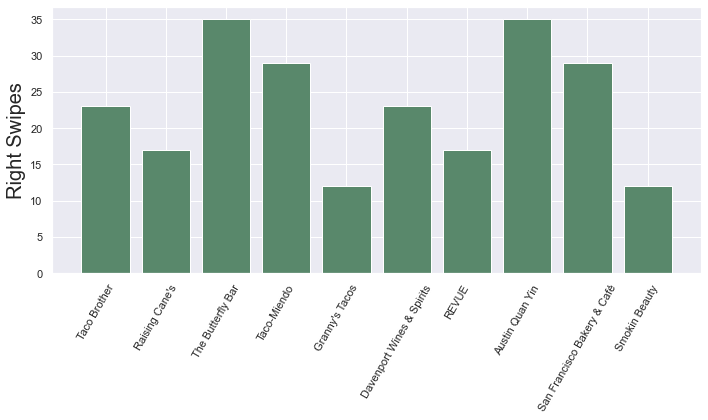

In [257]:
fig, ax = plt.subplots(figsize=(10, 6))
labels = sba_atx_res_open_df.iloc[rand_ids]['name']
x = range(10)
swipes = [23,17,35,29,12, 23,17,35,29,12]
plt.bar(x, swipes, color='#59886B')
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(labels)
plt.xticks(rotation=60)
trans = mtrans.Affine2D().translate(-10, 0)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
#plt.xlabel('Restaurant', fontsize = 20)
plt.ylabel('Right Swipes', fontsize = 20)
#plt.title('Right Swipes per Restaurant', fontsize=24)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('./img/sample_chart_3.png')
plt.show()


In [133]:
sba_sample_data_df = sba_atx_res_open_df.copy()

## Adding some of the columns we will need for analytics on the backend.

In [134]:
sba_sample_data_df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [152]:
sba_sample_data_df = sba_sample_data_df.assign(business_url = '', dish_name='This is a sample Go Dish name.', dish_cuisine ='Sample Go Dish cuisine.', dish_description='Sample Go Dish description', presented_count=0, left_swipes=0, right_swipes=0, user_rating=0.0, user_purchase=0, number_purchased=0,  num_favorited=0)

In [136]:
sba_sample_data_df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'business_url',
       'dish_name', 'dish_cuisine', 'dish_description', 'presented_count',
       'left_swipes', 'right_swipes', 'user_rating', 'user_purchase',
       'number_purchased', 'num_favorited'],
      dtype='object')

In [137]:
sba_sample_data_df['type_purchases'] = [[] for _ in range(len(sba_sample_data_df))]

In [138]:
sba_sample_data_df['favorites'] = [[] for _ in range(len(sba_sample_data_df))]

In [139]:
sba_sample_data_df.drop(['city', 'state'], inplace=True, axis=1)

In [140]:
sba_sample_data_df.drop(['is_open'], inplace=True, axis=1)

In [153]:
sba_sample_data_df.head()

,Unnamed: 0,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,...,dish_description,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,type_purchases,favorites
0,0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",78735,30.234533,-97.877262,4.5,395,"{'Ambience': ""{'touristy': False, 'hipster': F...",...,Sample Go Dish description,0,0,0,0.0,0,0,0,[],[]
1,5,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,78701,30.266996,-97.745362,3.5,119,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...",...,Sample Go Dish description,0,0,0,0.0,0,0,0,[],[]
2,6,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,78758,30.372930,-97.724076,4.0,149,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",...,Sample Go Dish description,0,0,0,0.0,0,0,0,[],[]
3,7,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,5303 Nuckols Crossing Rd,78744,30.192597,-97.738678,4.0,12,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...",...,Sample Go Dish description,0,0,0,0.0,0,0,0,[],[]
4,11,T55nNWr06T492oDUh0R8bQ,Cilantro's,1025 W Stassney Ln,78745,30.210061,-97.786881,3.5,37,"{'BikeParking': 'False', 'RestaurantsReservati...",...,Sample Go Dish description,0,0,0,0.0,0,0,0,[],[]


In [151]:
#Let's create some randomized data:

In [166]:
for i in range(len(sba_sample_data_df)):
    sba_sample_data_df['presented_count'].iloc[i] = random.randint(1, 1000)
    sba_sample_data_df['left_swipes'].iloc[i] = random.randint(0, sba_sample_data_df['presented_count'].iloc[i])
    sba_sample_data_df['right_swipes'].iloc[i] = sba_sample_data_df['presented_count'].iloc[i]-sba_sample_data_df['left_swipes'].iloc[i]

/Users/Keith/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [167]:
sba_sample_data_df.head()

,Unnamed: 0,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,...,dish_description,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,type_purchases,favorites
0,0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",78735,30.234533,-97.877262,4.5,395,"{'Ambience': ""{'touristy': False, 'hipster': F...",...,Sample Go Dish description,984,319,665,0.0,0,0,0,[],[]
1,5,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,78701,30.266996,-97.745362,3.5,119,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...",...,Sample Go Dish description,29,9,20,0.0,0,0,0,[],[]
2,6,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,78758,30.372930,-97.724076,4.0,149,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",...,Sample Go Dish description,721,494,227,0.0,0,0,0,[],[]
3,7,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,5303 Nuckols Crossing Rd,78744,30.192597,-97.738678,4.0,12,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...",...,Sample Go Dish description,186,12,174,0.0,0,0,0,[],[]
4,11,T55nNWr06T492oDUh0R8bQ,Cilantro's,1025 W Stassney Ln,78745,30.210061,-97.786881,3.5,37,"{'BikeParking': 'False', 'RestaurantsReservati...",...,Sample Go Dish description,529,262,267,0.0,0,0,0,[],[]


In [171]:
for i in range(len(sba_sample_data_df)):
    sba_sample_data_df['number_purchased'].iloc[i] = int(random.randint(0, 100)*0.01*sba_sample_data_df['right_swipes'].iloc[i])
    if sba_sample_data_df['number_purchased'].iloc[i] >= 1:
        sba_sample_data_df['user_purchase'].iloc[i] = 1
    else:
        sba_sample_data_df['user_purchase'].iloc[i] = 0
    sba_sample_data_df['num_favorited'].iloc[i] = int(random.randint(0, 50)*0.01*sba_sample_data_df['right_swipes'].iloc[i])

/Users/Keith/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [172]:
sba_sample_data_df.head()

,Unnamed: 0,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,...,dish_description,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,type_purchases,favorites
0,0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",78735,30.234533,-97.877262,4.5,395,"{'Ambience': ""{'touristy': False, 'hipster': F...",...,Sample Go Dish description,984,319,665,0.0,1,611,119,[],[]
1,5,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,78701,30.266996,-97.745362,3.5,119,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...",...,Sample Go Dish description,29,9,20,0.0,1,10,4,[],[]
2,6,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,78758,30.372930,-97.724076,4.0,149,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",...,Sample Go Dish description,721,494,227,0.0,1,202,95,[],[]
3,7,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,5303 Nuckols Crossing Rd,78744,30.192597,-97.738678,4.0,12,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...",...,Sample Go Dish description,186,12,174,0.0,1,50,3,[],[]
4,11,T55nNWr06T492oDUh0R8bQ,Cilantro's,1025 W Stassney Ln,78745,30.210061,-97.786881,3.5,37,"{'BikeParking': 'False', 'RestaurantsReservati...",...,Sample Go Dish description,529,262,267,0.0,1,74,82,[],[]


In [173]:
sba_sample_data_df[sba_sample_data_df['postal_code']==78705]

,Unnamed: 0,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,...,dish_description,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,type_purchases,favorites
13,28,2SbmgX5eHK4EMaIJmO1qbw,Song La,411 W 23rd St,78705,30.286199,-97.742561,4.5,136,"{'BikeParking': 'True', 'RestaurantsReservatio...",...,Sample Go Dish description,80,40,40,0.0,1,22,4,[],[]
29,57,e9KCQvafAkKzg5-rb7Sihg,Cain and Abel's,2313 Rio Grande St,78705,30.287671,-97.744488,3.0,108,"{'GoodForKids': 'False', 'RestaurantsAttire': ...",...,Sample Go Dish description,47,3,44,0.0,1,39,12,[],[]
65,114,UjWf2cuIVvajxJx2k0wasw,Momora Austin Food,411 W 23rd St,78705,30.286199,-97.742561,5.0,11,"{'WiFi': ""u'no'"", 'DogsAllowed': 'True', 'Bike...",...,Sample Go Dish description,63,14,49,0.0,1,47,14,[],[]
106,183,ff9xAuZ3-9iljMexfkf3yA,34th Street Cafe,1005 W 34th St,78705,30.302659,-97.745299,3.5,134,"{'RestaurantsDelivery': 'True', 'OutdoorSeatin...",...,Sample Go Dish description,49,30,19,0.0,1,4,6,[],[]
138,252,hRE4-SjrKpuYog4U9aX7MQ,Red River Market,3213 Red River St,78705,30.291429,-97.726458,3.0,10,"{'RestaurantsPriceRange2': '3', 'BikeParking':...",...,Sample Go Dish description,364,142,222,0.0,1,22,8,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,3800,HCVSPXCOpfDsWFykq04ZCw,Teji's Indian Restaurant and Grocery,2100B Guadalupe St,78705,30.283956,-97.742315,3.0,441,"{'Caters': 'True', 'RestaurantsTakeOut': 'True...",...,Sample Go Dish description,297,100,197,0.0,1,78,13,[],[]
2084,3805,KIwxVpjc588zbEBAp-heuA,West Campus Market,714 W 22nd St,78705,30.285156,-97.746350,4.0,5,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",...,Sample Go Dish description,844,625,219,0.0,1,102,89,[],[]
2136,3888,QmGqhWkdued9L98MP-jiPg,Thrive Craft House,519 W 37th St,78705,30.301754,-97.738540,4.5,17,"{'BusinessAcceptsCreditCards': 'True', 'CoatCh...",...,Sample Go Dish description,38,25,13,0.0,1,2,5,[],[]
2196,4008,F4qWfjoGGUJ7ioVySu9org,Mary's Cafe,3209 Red River St,78705,30.291420,-97.726961,4.5,311,"{'WiFi': ""u'free'"", 'Alcohol': ""'none'"", 'Rest...",...,Sample Go Dish description,812,237,575,0.0,1,356,184,[],[]


In [ ]:
#Save our work.

In [174]:
sba_sample_data_df.to_json('sb_sample_user_data.json')

In [175]:
sba_sample_data_df.to_csv('sb_sample_user_data.csv')

# Let's look at one zip code in particular, 78705:

In [176]:
downtown_df = sba_sample_data_df[sba_sample_data_df['postal_code']==78705]

In [177]:
len(downtown_df)

106

In [187]:
import seaborn as sns

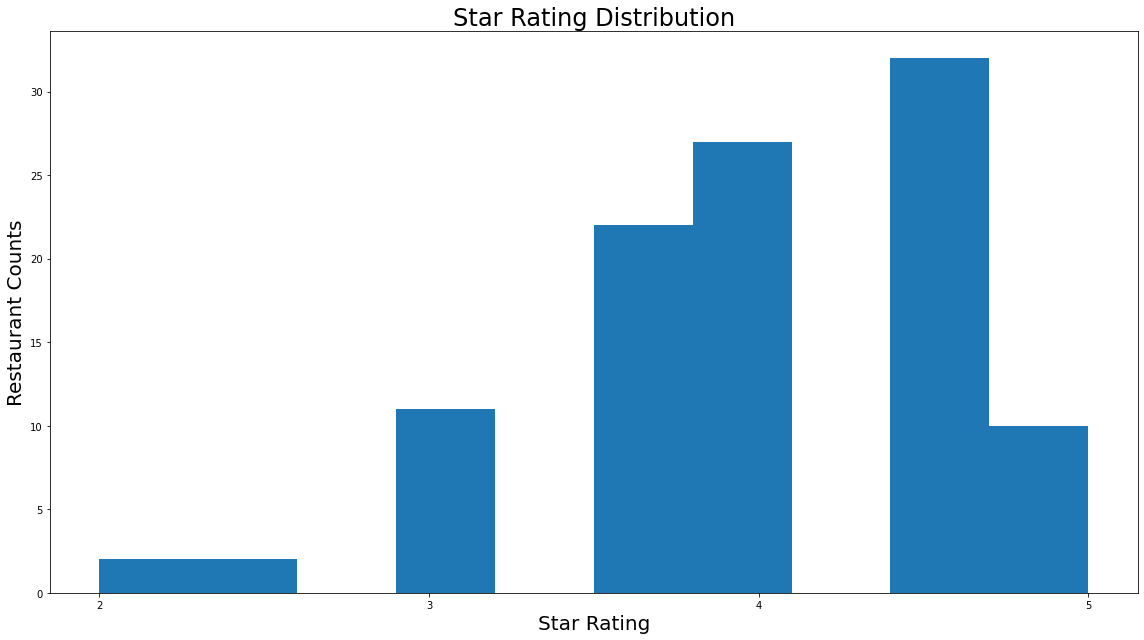

In [186]:
fig, ax = plt.subplots(figsize=(16,9))
star_ratings = downtown_df['stars']
ax.set_xticks(np.arange(10))
#ax.set_xticklabels([1, 2, 3, 4, 5])

plt.xlabel('Star Rating', fontsize = 20)
plt.ylabel('Restaurant Counts', fontsize = 20)
plt.title('Star Rating Distribution', fontsize=24)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('./img/sample_star.png')
plt.hist(star_ratings, bins = 10)
plt.show()

In [200]:
freq = downtown_df['stars'].value_counts()
freq

4.5    32
4.0    27
3.5    22
3.0    11
5.0    10
2.0     2
2.5     2
Name: stars, dtype: int64

In [206]:
x_vals = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [207]:
y_vals = [freq[i] if i in freq.index else 0 for i in x ]

In [208]:
y_vals

[0, 0, 0, 0, 2, 2, 11, 22, 27, 32, 10]

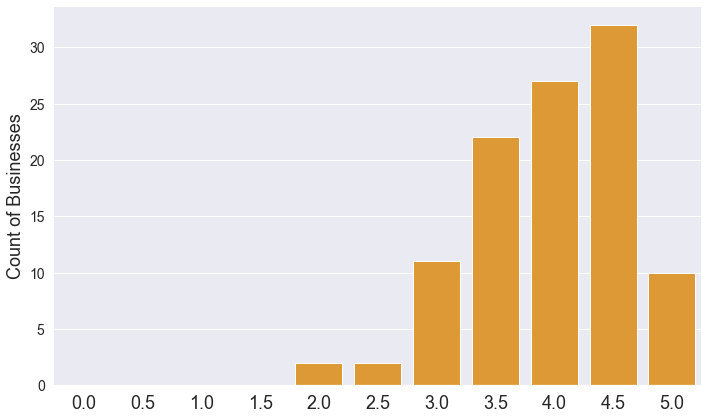

In [256]:
plt.figure(figsize=(10, 6))
plt.xlabel('')
plt.ylabel('Count of Businesses', size=18)
#plt.title('Star Rating Distribution, 78705 Small Businesses', size=18)
sns.despine(left=True);
sns.set(style="darkgrid")
plt.xticks(size=18)
plt.yticks(size=14)
sns.color_palette("crest", as_cmap=True)
sns.barplot(data = downtown_df, x = x_vals, y = y_vals, color='#F79E1B');
plt.savefig('./img/star_rating_dist_2.png')

Let's make a function so we can perform this repeatedly with our app:

In [ ]:
def plot_local_stars(df):
    x_vals = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
    freq = df['stars'].value_counts()
    y_vals = [freq[i] if i in freq.index else 0 for i in x ]
    
    plt.figure(figsize=(10, 6))
    plt.xlabel('Star Rating')
    plt.ylabel('Count', size=18)
    sns.despine(left=True);
    sns.set(style="darkgrid")
    plt.xticks(size=18)
    plt.yticks(size=14)
    sns.color_palette("crest", as_cmap=True)
    sns.barplot(data = df, x = x_vals, y = y_vals, color='#F79E1B');
    plt.savefig('./static/img/zip_star_rating_dist.png')

In [232]:
import json

In [233]:
f = open('sba_atx_res_open.json')
data = json.load(f)
f.close()

In [251]:
pd.DataFrame(data).reset_index(drop=True).head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
1,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,Austin,TX,78701,30.266996,-97.745362,3.5,119,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Tex-Mex, Mexican, Tacos, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,Austin,TX,78758,30.372930,-97.724076,4.0,149,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Restaurants, Indian","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3..."
3,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,5303 Nuckols Crossing Rd,Austin,TX,78744,30.192597,-97.738678,4.0,12,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Restaurants, Food, Food Trucks, Mexican","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
4,T55nNWr06T492oDUh0R8bQ,Cilantro's,1025 W Stassney Ln,Austin,TX,78745,30.210061,-97.786881,3.5,37,1,"{'BikeParking': 'False', 'RestaurantsReservati...","Restaurants, Mexican",None


In [255]:
for key, value in data.items():
    print(key)

business_id
name
address
city
state
postal_code
latitude
longitude
stars
review_count
is_open
attributes
categories
hours


In [291]:
#add in a few user ratings before analysis:
for i in range(len(sba_sample_data_df)):
    fill_int = int((random.randint(0, 1)*0.5+0.5)+(sba_sample_data_df['right_swipes'].iloc[i]/sba_sample_data_df['presented_count'].iloc[i])*5)+1
    if fill_int > 5:
        sba_sample_data_df['user_rating'].iloc[i] = 5
    else:
        sba_sample_data_df['user_rating'].iloc[i] = fill_int

/Users/Keith/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Lets look at restaurant conversion, and then one restaurant as an example:

In our app, the defined success is a purchase, using the proxy of clicking through to either ubereats, doordash, or the restaurant website or phone number as our stand-in. At that point the ball is handed to another vendor or the restaurant themselves. Let's see what we can learn about the way that conversions are recorded, and which restaurants are most successful at converting sales:

In [258]:
#Overall conversion analysis:

In [292]:
#First inspect our df to make sure its what we want to work with:
sba_sample_data_df.head()

,Unnamed: 0,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,...,dish_description,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,type_purchases,favorites
0,0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",78735,30.234533,-97.877262,4.5,395,"{'Ambience': ""{'touristy': False, 'hipster': F...",...,Sample Go Dish description,984,319,665,4.0,1,611,119,[],[]
1,5,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,214 W 4th St,78701,30.266996,-97.745362,3.5,119,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...",...,Sample Go Dish description,29,9,20,4.0,1,10,4,[],[]
2,6,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,9025 Research Blvd,78758,30.372930,-97.724076,4.0,149,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",...,Sample Go Dish description,721,494,227,3.0,1,202,95,[],[]
3,7,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,5303 Nuckols Crossing Rd,78744,30.192597,-97.738678,4.0,12,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...",...,Sample Go Dish description,186,12,174,5.0,1,50,3,[],[]
4,11,T55nNWr06T492oDUh0R8bQ,Cilantro's,1025 W Stassney Ln,78745,30.210061,-97.786881,3.5,37,"{'BikeParking': 'False', 'RestaurantsReservati...",...,Sample Go Dish description,529,262,267,4.0,1,74,82,[],[]


In [293]:
#Let's select just the columns we want to work with:
subset = sba_sample_data_df[['business_id', 'name', 'postal_code', 'latitude', 'longitude', 
                             'stars', 'review_count', 'presented_count', 'left_swipes', 'right_swipes', 
                             'user_rating', 'user_purchase', 'number_purchased', 'num_favorited']]
subset.head()

,business_id,name,postal_code,latitude,longitude,stars,review_count,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited
0,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,78735,30.234533,-97.877262,4.5,395,984,319,665,4.0,1,611,119
1,IFB2K3BEZ2L_Mv5AbUD26Q,Chispas,78701,30.266996,-97.745362,3.5,119,29,9,20,4.0,1,10,4
2,LjQ_z_eYTvbPkdnxD_Ucrw,Zaika Indian Contemporary Cuisine,78758,30.372930,-97.724076,4.0,149,721,494,227,3.0,1,202,95
3,UbP_JuB-zHHfLz2dvKe9yw,Taqueria Peloncitos,78744,30.192597,-97.738678,4.0,12,186,12,174,5.0,1,50,3
4,T55nNWr06T492oDUh0R8bQ,Cilantro's,78745,30.210061,-97.786881,3.5,37,529,262,267,4.0,1,74,82


In [294]:
#Almost all of the restaurants have had some kind of purchase, but some have not.
subset['user_purchase'].value_counts()

1    2136
0      84
Name: user_purchase, dtype: int64

In [295]:
res_with_purchase = subset[subset['user_purchase']==1]
res_wo_purchase = subset[subset['user_purchase']==0]

In [296]:
#Let's do some basic analysis on the restaurants that do and don't have purchases:
res_with_purchase['stars'].mean()

4.033005617977528

In [297]:
res_wo_purchase['stars'].mean()

3.9702380952380953

In [298]:
res_with_purchase['user_rating'].mean()

3.38061797752809

In [299]:
res_wo_purchase['user_rating'].mean()

2.4047619047619047

In [302]:
#What this shows us is that the users of the app might be a bit more discerning than the general public, or full body of reviews. Also, it looks like restaurants without 
#a purchase tend to have a lower overall user rating.

In [300]:
import scipy.stats as stats

In [301]:
# A T test determines statistical independence, as verified by the pvalue < 0.05.
stats.ttest_ind(res_with_purchase['user_rating'], res_wo_purchase['user_rating'])

Ttest_indResult(statistic=6.552669914397525, pvalue=7.004928193725864e-11)

In [303]:
#confirmed with a Ttest, the distributions of the user ratings are statistically independent.

### Let's add an engineered feature, conversion rate, to calculate how often a presentation of the restaurant results in a purchase.

Conversion rate defined as purchases/presentations. With a targeted audience that has come to this app and are hungry, we expect a better conversion in most cases than the
general e-commerce rate of ~1-5% conversion.

In [304]:
subset['conv_rate'] = subset['number_purchased']/subset['presented_count']

<ipython-input-304-9d003a3f2a59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['conv_rate'] = subset['number_purchased']/subset['presented_count']


<AxesSubplot:>

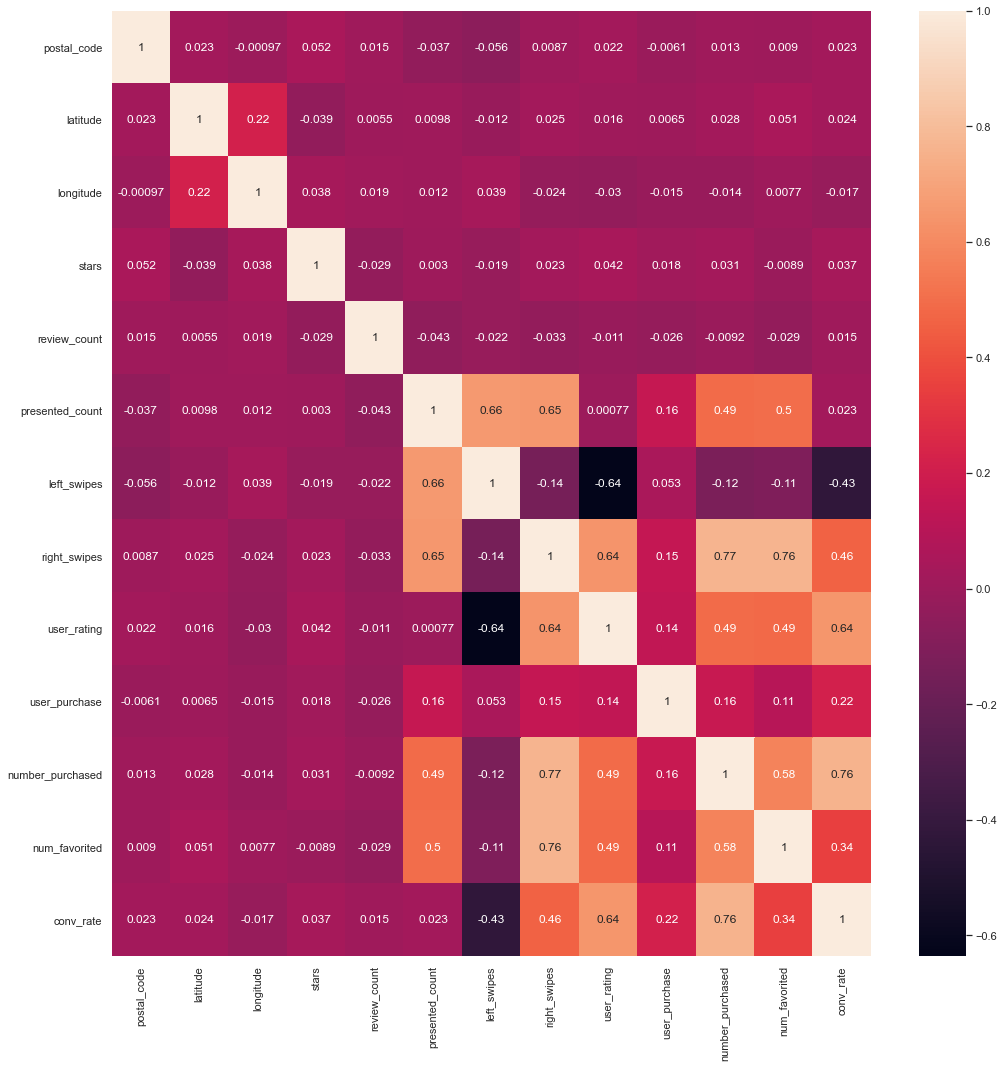

In [310]:
plt.figure(figsize = (15, 15))
sns.heatmap(subset.corr(), annot=True)

In [ ]:
#Looks like right swipes are correlated with number purchased, and the user's rating. And the user rating is highly correlated with conversion rate. What can we take away from 
#this?

The key takeaway we have here is that, getting more right swipes and a higher user rating, will lead to better outcomes. 

### Let's take a look at one of Austin's restaurants downtown:

In [314]:
subset[subset['name'].str.match('The Jackalope')]

,business_id,name,postal_code,latitude,longitude,stars,review_count,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,conv_rate
969,LXQiHzcMUxm4hp36v_Ah_w,The Jackalope,78701,30.267185,-97.738974,4.0,965,239,208,31,2.0,1,30,2,0.125523


In [317]:
subset[subset['postal_code']==78701].describe()

,postal_code,latitude,longitude,stars,review_count,presented_count,left_swipes,right_swipes,user_rating,user_purchase,number_purchased,num_favorited,conv_rate
count,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,78701.0,30.266914,-97.742464,3.893536,255.292776,453.155894,244.311787,208.844106,3.281369,0.946768,101.714829,51.623574,0.230195
std,0.0,0.005229,0.004060,0.581256,457.859342,288.034194,232.289915,203.765025,1.399535,0.224924,135.736380,64.220687,0.225148
min,78701.0,30.254463,-97.752790,1.500000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,78701.0,30.264178,-97.745071,3.500000,23.000000,197.500000,64.500000,55.000000,2.000000,1.000000,14.000000,8.000000,0.043450
50%,78701.0,30.266980,-97.741950,4.000000,80.000000,424.000000,153.000000,144.000000,3.000000,1.000000,44.000000,27.000000,0.144986
75%,78701.0,30.269113,-97.738945,4.500000,311.500000,707.500000,385.500000,293.500000,5.000000,1.000000,134.000000,70.500000,0.369773
max,78701.0,30.282901,-97.734031,5.000000,4833.000000,999.000000,941.000000,944.000000,5.000000,1.000000,726.000000,340.000000,0.913440


In [ ]:
#Relative to restaurants in its zipcode, it appears the Jackalope is doing pretty poorly.